In [1]:
import warnings
import numpy as np   
import pandas as pd   
import seaborn as sns
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')  

In [2]:
data = pd.read_csv('heart.csv') 
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
data.shape

(918, 12)

In [4]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
data_cols = data.columns 
num_cols = [] 
obj_cols = [] 
for col in data_cols:   
    if data[col].dtype == 'object': 
        obj_cols.append(col)  
    else: 
        num_cols.append(col)    
print("Total columns:", data_cols)   
print("Numeric Columns:", num_cols)   
print("Object_columns:", obj_cols)

Total columns: Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')
Numeric Columns: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']
Object_columns: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


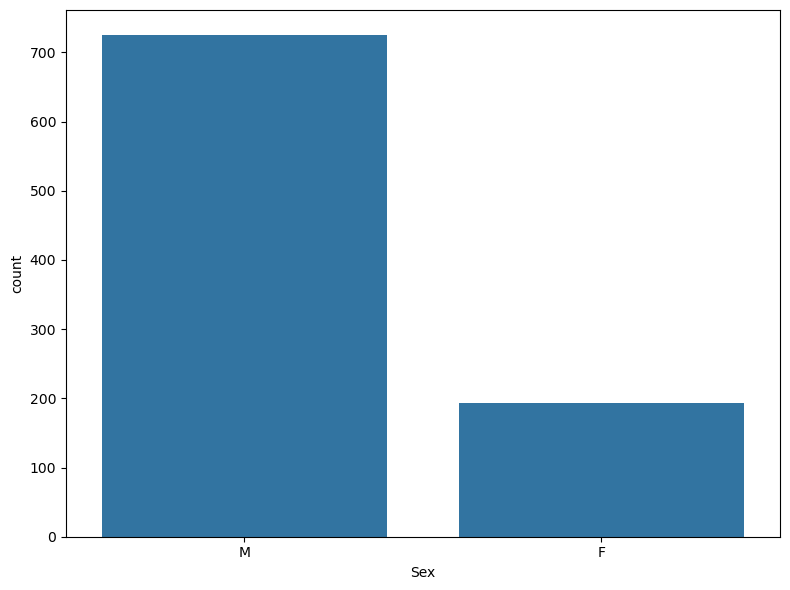

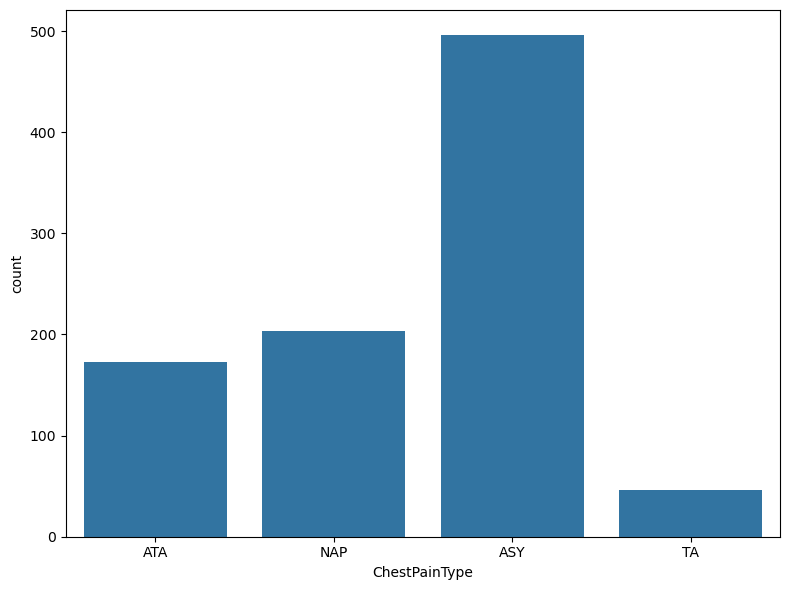

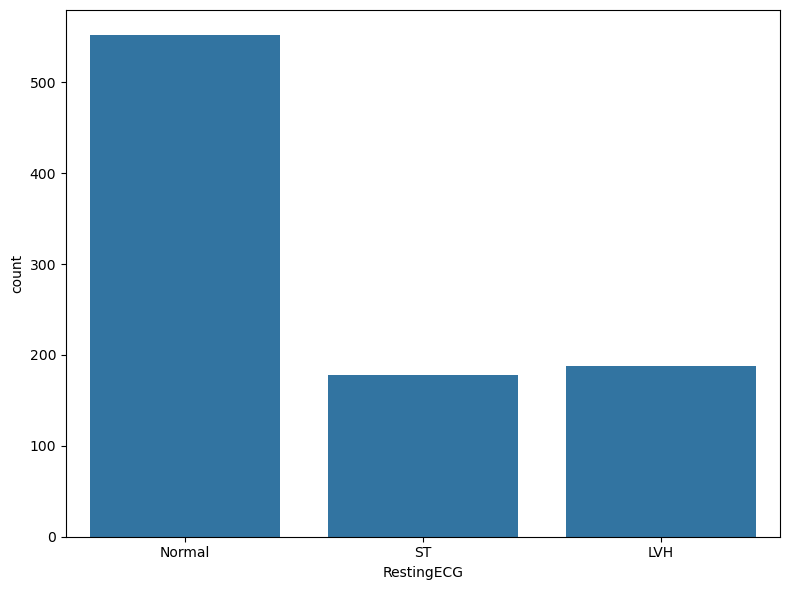

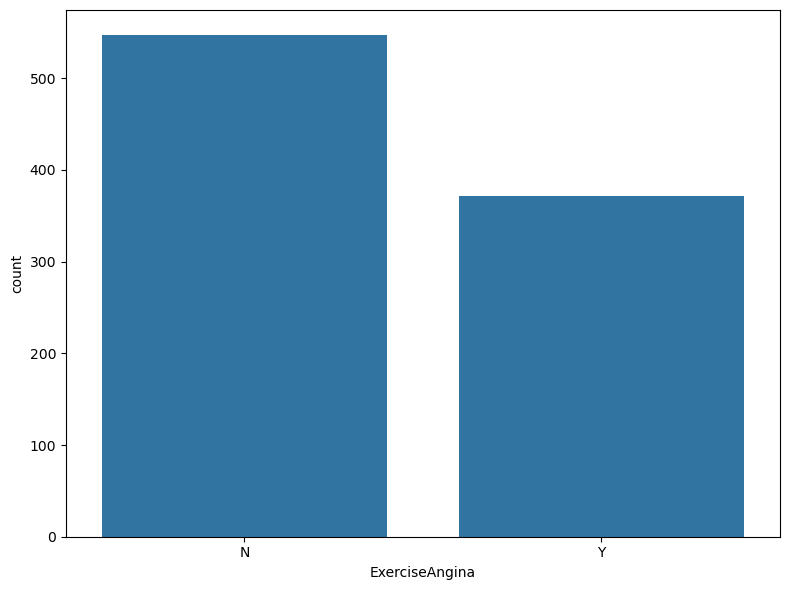

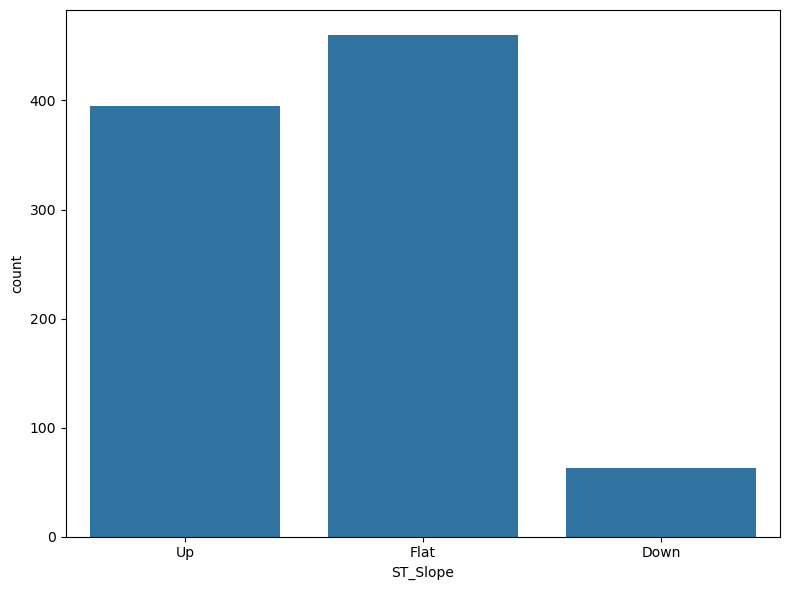

In [8]:
for col in obj_cols:  
    plt.figure(figsize= (8, 6))  
    sns.countplot(x = data[col]) 
    plt.tight_layout()
    plt.show()  

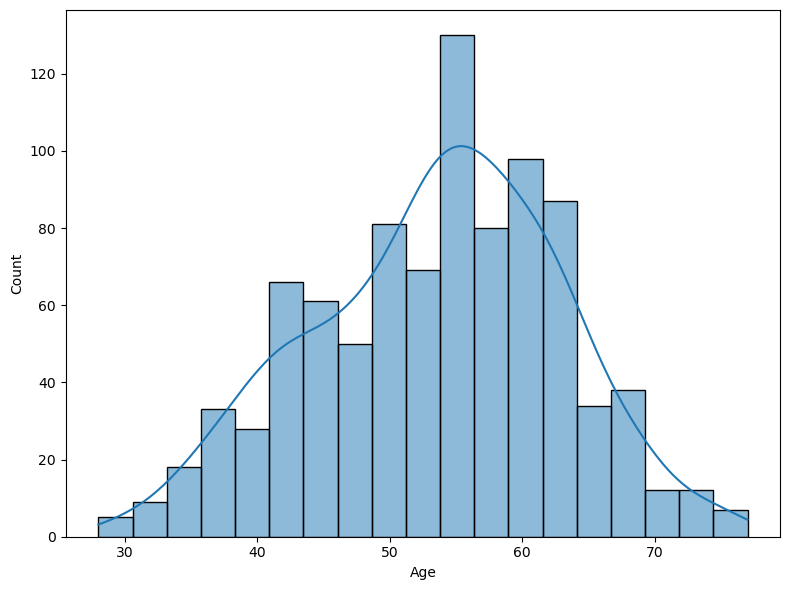

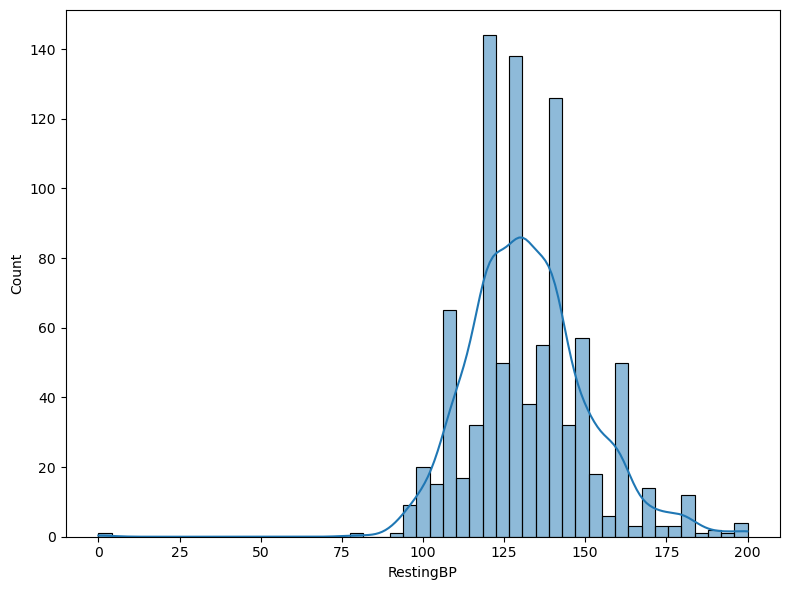

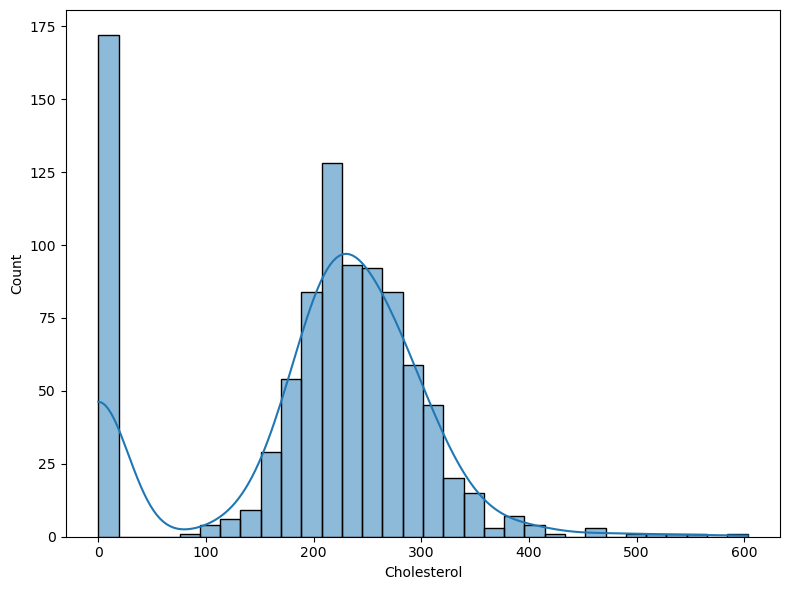

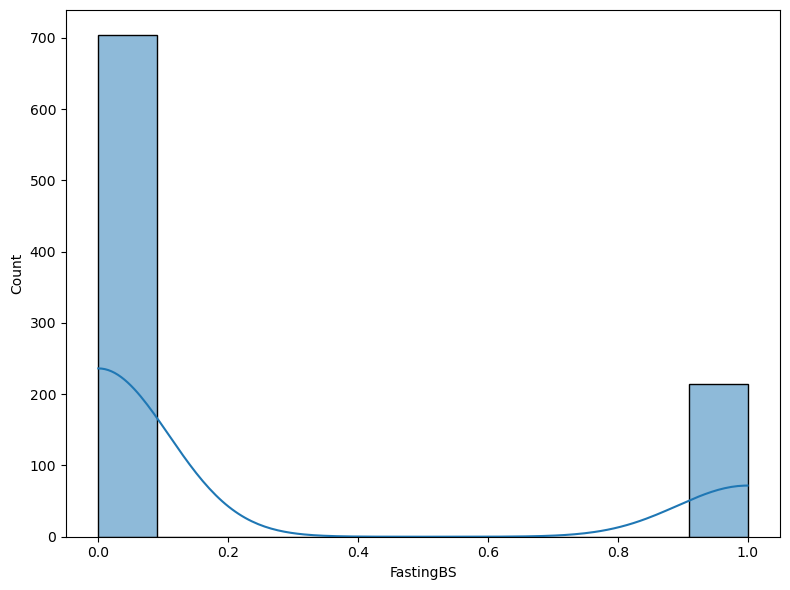

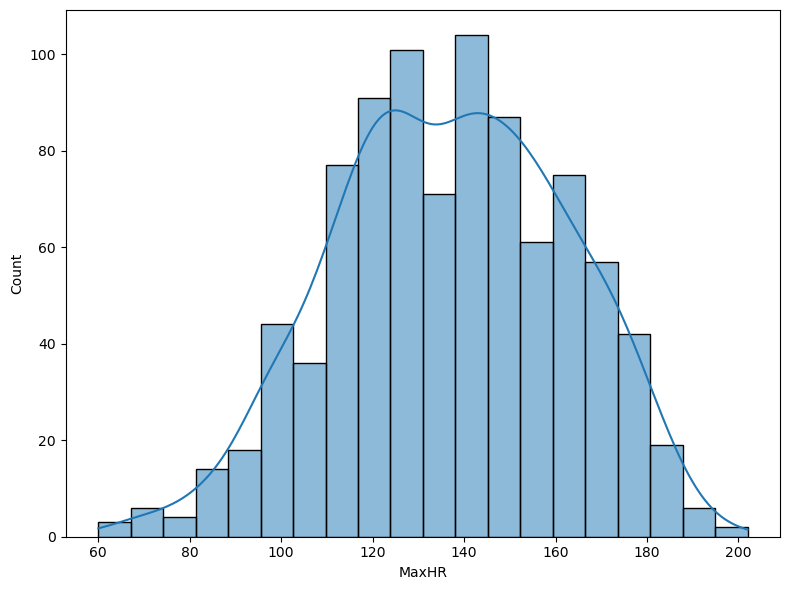

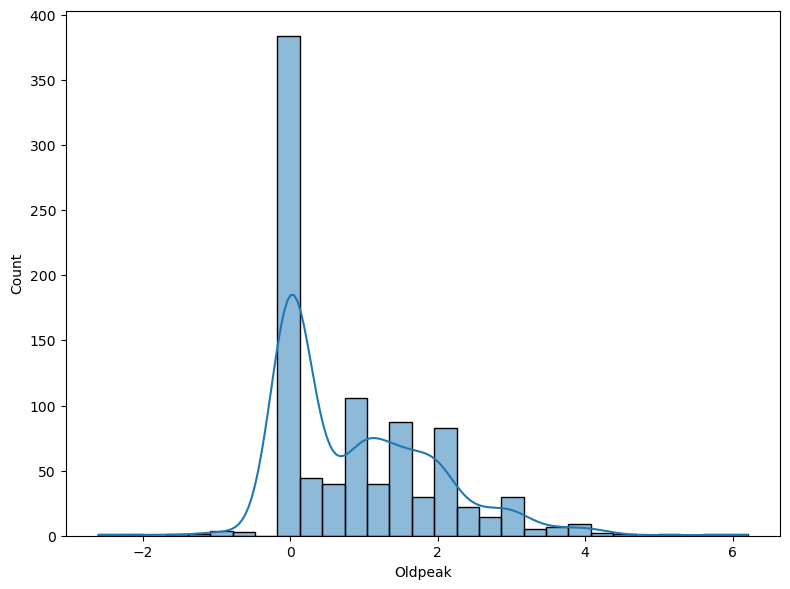

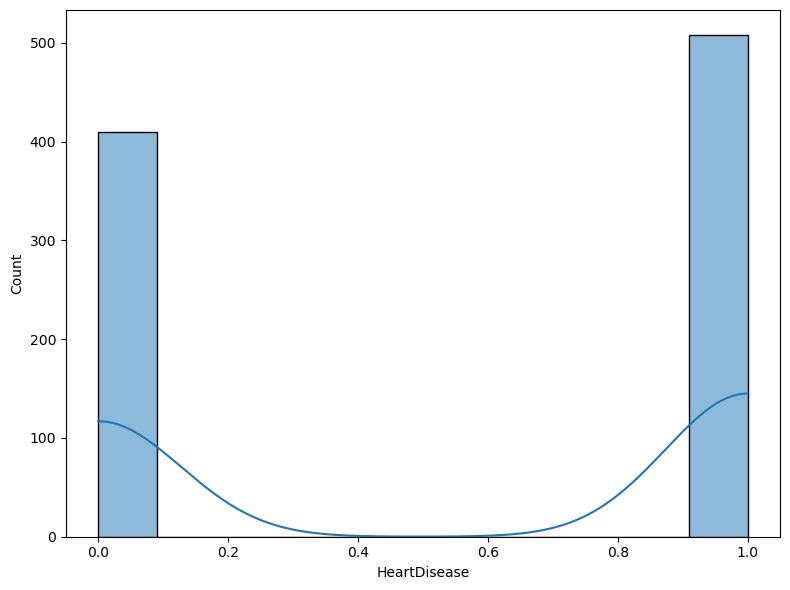

In [9]:
for col in num_cols:  
    plt.figure(figsize= (8, 6))  
    sns.histplot(data[col], kde= True)  
    plt.tight_layout() 
    plt.show()

In [10]:
data['RestingBP'] = data['RestingBP'].replace(0, data[data['RestingBP'] != 0]['RestingBP'].mean())
data['RestingBP']

0      140.0
1      160.0
2      130.0
3      138.0
4      150.0
       ...  
913    110.0
914    144.0
915    130.0
916    130.0
917    138.0
Name: RestingBP, Length: 918, dtype: float64

<Axes: xlabel='RestingBP', ylabel='Count'>

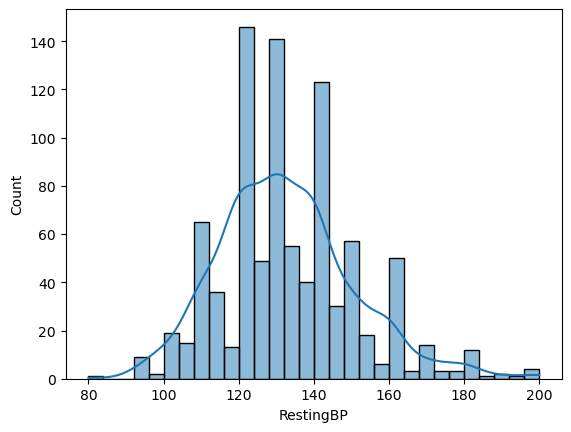

In [11]:
sns.histplot(data['RestingBP'], kde= True)

In [12]:
data['Cholesterol'] = data['Cholesterol'].replace(0, data[data['Cholesterol'] != 0]['Cholesterol'].mean())
data['Cholesterol']

0      289.0
1      180.0
2      283.0
3      214.0
4      195.0
       ...  
913    264.0
914    193.0
915    131.0
916    236.0
917    175.0
Name: Cholesterol, Length: 918, dtype: float64

<Axes: xlabel='Cholesterol', ylabel='Count'>

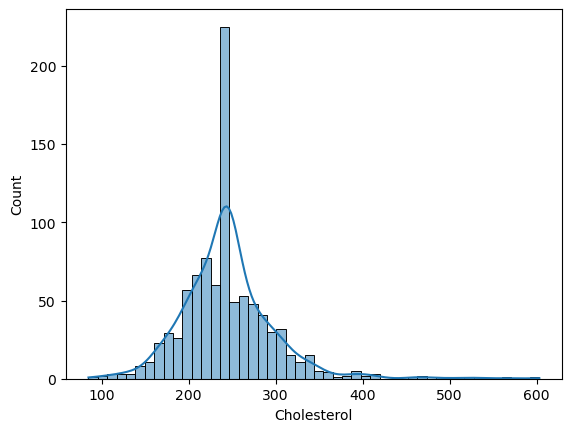

In [13]:
sns.histplot(data['Cholesterol'], kde= True)

<Axes: >

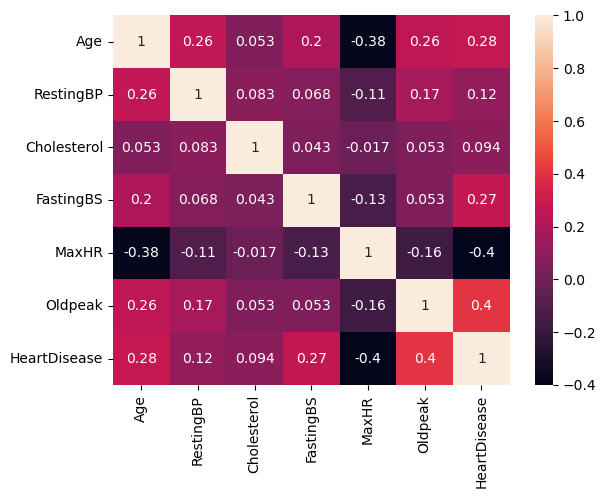

In [14]:
sns.heatmap(data.corr(numeric_only= True), annot= True)

In [15]:
df = data
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144.0,193.0,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130.0,131.0,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130.0,236.0,0,LVH,174,N,0.0,Flat,1


# Label Encoding

In [16]:
y = df['HeartDisease'] 
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [17]:
X = df.drop(['HeartDisease'], axis= 1) 
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144.0,193.0,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130.0,131.0,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130.0,236.0,0,LVH,174,N,0.0,Flat


In [18]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()

In [19]:
X['is_male'] = le.fit_transform(X['Sex'])  
X['ChestPainType'] = le.fit_transform(X['ChestPainType'])
X['RestingECG'] = le.fit_transform(X['RestingECG'])
X['ExerciseAngina'] = le.fit_transform(X['ExerciseAngina'])
X['ST_Slope'] = le.fit_transform(X['ST_Slope']) 
X = X.drop(['Sex'], axis= 1) 
X

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,is_male
0,40,1,140.0,289.0,0,1,172,0,0.0,2,1
1,49,2,160.0,180.0,0,1,156,0,1.0,1,0
2,37,1,130.0,283.0,0,2,98,0,0.0,2,1
3,48,0,138.0,214.0,0,1,108,1,1.5,1,0
4,54,2,150.0,195.0,0,1,122,0,0.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
913,45,3,110.0,264.0,0,1,132,0,1.2,1,1
914,68,0,144.0,193.0,1,1,141,0,3.4,1,1
915,57,0,130.0,131.0,0,1,115,1,1.2,1,1
916,57,1,130.0,236.0,0,0,174,0,0.0,1,0


# Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler 
s_scale = StandardScaler()  

In [21]:
cols_for_scaling = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'] 
X[cols_for_scaling] = s_scale.fit_transform(X[cols_for_scaling])    
X

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,is_male
0,-1.433140,1,0.414853,0.832529,0,1,1.382928,0,-0.832432,2,1
1,-0.478484,2,1.527192,-1.212922,0,1,0.754157,0,0.105664,1,0
2,-1.751359,1,-0.141317,0.719935,0,2,-1.525138,0,-0.832432,2,1
3,-0.584556,0,0.303619,-0.574892,0,1,-1.132156,1,0.574711,1,0
4,0.051881,2,0.971022,-0.931438,0,1,-0.581981,0,-0.832432,2,1
...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,3,-1.253656,0.363389,0,1,-0.188999,0,0.293283,1,1
914,1.536902,0,0.637320,-0.968969,1,1,0.164684,0,2.357094,1,1
915,0.370100,0,-0.141317,-2.132437,0,1,-0.857069,1,0.293283,1,1
916,0.370100,1,-0.141317,-0.162048,0,0,1.461525,0,-0.832432,1,0


# Train Test Split

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

# XGBoost

In [23]:
from xgboost import XGBRFClassifier 
model_xg = XGBRFClassifier(learning_rate= 1.0) 
model_xg.fit(X_train, y_train)  
y_pred = model_xg.predict(X_test) 
result = pd.DataFrame({"Real": y_test, "Predict": y_pred}) 
result

,Real,Predict
668,0,0
30,1,1
377,1,1
535,1,1
807,0,0
...,...,...
133,1,1
813,0,0
734,1,1
360,1,1


In [24]:
print("Training Accuracy:", model_xg.score(X_train, y_train)) 
print("Testing Accuracy:", model_xg.score(X_test, y_test))

Training Accuracy: 0.9158878504672897
Testing Accuracy: 0.8659420289855072


In [26]:
from sklearn.model_selection import cross_val_score 

score = cross_val_score(model_xg, X, y, cv= 5) 
score.mean()

np.float64(0.8277500593965312)

In [27]:
import joblib 
joblib.dump(model_xg, 'model.pkl')

['model.pkl']